# 병원 데이터 전처리

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from glob import glob

In [2]:
medical = pd.read_csv("medical.csv", encoding = 'utf-8')
medical

,시도명,시군구명,의료기관종별,의료기관명,개설구분,개설일자,입원실,병상,연락처,응급의료센터지정,소재지도로명주소,소재지지번주소,경도,위도,데이터기준일자
0,강원도,강릉시,의원,청플러스비뇨기과의원,민간,02/01/2017,0.0,0.0,033-646-0182,N,강원도 강릉시 경강로 2110 3층 (임당동),강원도 강릉시 임당동 114번지 2호,128.897642,37.755512,03/28/2018
1,강원도,강릉시,의원,연세재활의학과의원,민간,01/17/2017,0.0,0.0,033-655-7522,N,강원도 강릉시 솔올로5번길 40 3층 (교동),강원도 강릉시 교동 1885-9,128.875374,37.765645,03/28/2018
2,강원도,강릉시,치과의원,화이트치과의원,민간,04/16/2004,0.0,0.0,033-641-8275,N,강원도 강릉시 교동광장로 137 (교동),강원도 강릉시 교1동 1861번지 2호,128.879949,37.764468,03/28/2018
3,강원도,강릉시,치과의원,관동치과의원,민간,05/08/1987,0.0,0.0,033-642-3342,N,강원도 강릉시 범일로 604 (내곡동),강원도 강릉시 내곡동 422번지 10호 하나로마트2층,128.880719,37.741279,03/28/2018
4,강원도,강릉시,치과의원,굿모닝치과의원,민간,05/03/2013,0.0,0.0,033-642-7528,N,강원도 강릉시 하평길 56 2층 (포남동 우호빌딩),강원도 강릉시 포남동 1193번지 1호,128.914283,37.770036,03/28/2018
5,강원도,강릉시,치과의원,김재구치과의원,민간,05/20/1988,0.0,0.0,033-643-5562,N,강원도 강릉시 경강로 2068 (성내동),강원도 강릉시 성내동 6번지 8호,128.893794,37.752984,03/28/2018
6,강원도,강릉시,치과의원,정원치과의원,민간,06/22/2012,0.0,0.0,033-644-4888,N,강원도 강릉시 교동광장로 106 5층 (교동 화영빌딩),강원도 강릉시 교동 1883번지 2호,128.876056,37.764416,03/28/2018
7,강원도,강릉시,치과의원,아라치과의원,민간,11/27/2012,0.0,0.0,033-644-7528,N,강원도 강릉시 솔올로 25 (교동),강원도 강릉시 교동 1882번지 3호,128.877597,37.764189,03/28/2018
8,강원도,강릉시,치과의원,영동치과의원,민간,06/11/2001,0.0,0.0,033-645-2875,N,강원도 강릉시 경강로 2106 (임당동),강원도 강릉시 임당동 117번지 2호,128.897235,37.755067,03/28/2018
9,강원도,강릉시,치과의원,제이치과의원,민간,01/03/2004,0.0,0.0,033-646-6513,N,강원도 강릉시 솔올로 17 3층 (교동 교동플라자),강원도 강릉시 교동 1888번지 2호,128.877218,37.762885,03/28/2018


In [3]:
del medical['의료기관명']
del medical['개설구분']
del medical['의료기관종별']
del medical['입원실']
del medical['병상']
del medical['연락처']
del medical['응급의료센터지정']
del medical['소재지도로명주소']
del medical['경도']
del medical['위도']
del medical['데이터기준일자']
del medical['시도명']
medical

,시군구명,개설일자,소재지지번주소
0,강릉시,02/01/2017,강원도 강릉시 임당동 114번지 2호
1,강릉시,01/17/2017,강원도 강릉시 교동 1885-9
2,강릉시,04/16/2004,강원도 강릉시 교1동 1861번지 2호
3,강릉시,05/08/1987,강원도 강릉시 내곡동 422번지 10호 하나로마트2층
4,강릉시,05/03/2013,강원도 강릉시 포남동 1193번지 1호
5,강릉시,05/20/1988,강원도 강릉시 성내동 6번지 8호
6,강릉시,06/22/2012,강원도 강릉시 교동 1883번지 2호
7,강릉시,11/27/2012,강원도 강릉시 교동 1882번지 3호
8,강릉시,06/11/2001,강원도 강릉시 임당동 117번지 2호
9,강릉시,01/03/2004,강원도 강릉시 교동 1888번지 2호


In [4]:
medical2 = medical.copy()
medical2

,시군구명,개설일자,소재지지번주소
0,강릉시,02/01/2017,강원도 강릉시 임당동 114번지 2호
1,강릉시,01/17/2017,강원도 강릉시 교동 1885-9
2,강릉시,04/16/2004,강원도 강릉시 교1동 1861번지 2호
3,강릉시,05/08/1987,강원도 강릉시 내곡동 422번지 10호 하나로마트2층
4,강릉시,05/03/2013,강원도 강릉시 포남동 1193번지 1호
5,강릉시,05/20/1988,강원도 강릉시 성내동 6번지 8호
6,강릉시,06/22/2012,강원도 강릉시 교동 1883번지 2호
7,강릉시,11/27/2012,강원도 강릉시 교동 1882번지 3호
8,강릉시,06/11/2001,강원도 강릉시 임당동 117번지 2호
9,강릉시,01/03/2004,강원도 강릉시 교동 1888번지 2호


In [5]:
medical2['개설일자'] = medical2['개설일자'].str.extract('(\d{4})')
medical2

,시군구명,개설일자,소재지지번주소
0,강릉시,2017,강원도 강릉시 임당동 114번지 2호
1,강릉시,2017,강원도 강릉시 교동 1885-9
2,강릉시,2004,강원도 강릉시 교1동 1861번지 2호
3,강릉시,1987,강원도 강릉시 내곡동 422번지 10호 하나로마트2층
4,강릉시,2013,강원도 강릉시 포남동 1193번지 1호
5,강릉시,1988,강원도 강릉시 성내동 6번지 8호
6,강릉시,2012,강원도 강릉시 교동 1883번지 2호
7,강릉시,2012,강원도 강릉시 교동 1882번지 3호
8,강릉시,2001,강원도 강릉시 임당동 117번지 2호
9,강릉시,2004,강원도 강릉시 교동 1888번지 2호


In [6]:
medical2 = medical2.dropna()

In [7]:
medical2

,시군구명,개설일자,소재지지번주소
0,강릉시,2017,강원도 강릉시 임당동 114번지 2호
1,강릉시,2017,강원도 강릉시 교동 1885-9
2,강릉시,2004,강원도 강릉시 교1동 1861번지 2호
3,강릉시,1987,강원도 강릉시 내곡동 422번지 10호 하나로마트2층
4,강릉시,2013,강원도 강릉시 포남동 1193번지 1호
5,강릉시,1988,강원도 강릉시 성내동 6번지 8호
6,강릉시,2012,강원도 강릉시 교동 1883번지 2호
7,강릉시,2012,강원도 강릉시 교동 1882번지 3호
8,강릉시,2001,강원도 강릉시 임당동 117번지 2호
9,강릉시,2004,강원도 강릉시 교동 1888번지 2호


In [8]:
medical2 = medical2[medical2.개설일자 != '2017']
medical2 = medical2[medical2.개설일자 != '2018']
medical2

,시군구명,개설일자,소재지지번주소
2,강릉시,2004,강원도 강릉시 교1동 1861번지 2호
3,강릉시,1987,강원도 강릉시 내곡동 422번지 10호 하나로마트2층
4,강릉시,2013,강원도 강릉시 포남동 1193번지 1호
5,강릉시,1988,강원도 강릉시 성내동 6번지 8호
6,강릉시,2012,강원도 강릉시 교동 1883번지 2호
7,강릉시,2012,강원도 강릉시 교동 1882번지 3호
8,강릉시,2001,강원도 강릉시 임당동 117번지 2호
9,강릉시,2004,강원도 강릉시 교동 1888번지 2호
10,강릉시,1998,강원도 강릉시 임당동 85번지 10호
11,강릉시,2014,강원도 강릉시 금학동 16-2


In [9]:
 medical2['동읍면']= [eachAddress.split()[2] for eachAddress in medical2['소재지지번주소']]
 medical2

,시군구명,개설일자,소재지지번주소,동읍면
2,강릉시,2004,강원도 강릉시 교1동 1861번지 2호,교1동
3,강릉시,1987,강원도 강릉시 내곡동 422번지 10호 하나로마트2층,내곡동
4,강릉시,2013,강원도 강릉시 포남동 1193번지 1호,포남동
5,강릉시,1988,강원도 강릉시 성내동 6번지 8호,성내동
6,강릉시,2012,강원도 강릉시 교동 1883번지 2호,교동
7,강릉시,2012,강원도 강릉시 교동 1882번지 3호,교동
8,강릉시,2001,강원도 강릉시 임당동 117번지 2호,임당동
9,강릉시,2004,강원도 강릉시 교동 1888번지 2호,교동
10,강릉시,1998,강원도 강릉시 임당동 85번지 10호,임당동
11,강릉시,2014,강원도 강릉시 금학동 16-2,금학동


In [10]:
medical2['시군구동읍면명'] = medical2['시군구명'].map(str) + " " + medical2['동읍면'].map(str)

medical2


,시군구명,개설일자,소재지지번주소,동읍면,시군구동읍면명
2,강릉시,2004,강원도 강릉시 교1동 1861번지 2호,교1동,강릉시 교1동
3,강릉시,1987,강원도 강릉시 내곡동 422번지 10호 하나로마트2층,내곡동,강릉시 내곡동
4,강릉시,2013,강원도 강릉시 포남동 1193번지 1호,포남동,강릉시 포남동
5,강릉시,1988,강원도 강릉시 성내동 6번지 8호,성내동,강릉시 성내동
6,강릉시,2012,강원도 강릉시 교동 1883번지 2호,교동,강릉시 교동
7,강릉시,2012,강원도 강릉시 교동 1882번지 3호,교동,강릉시 교동
8,강릉시,2001,강원도 강릉시 임당동 117번지 2호,임당동,강릉시 임당동
9,강릉시,2004,강원도 강릉시 교동 1888번지 2호,교동,강릉시 교동
10,강릉시,1998,강원도 강릉시 임당동 85번지 10호,임당동,강릉시 임당동
11,강릉시,2014,강원도 강릉시 금학동 16-2,금학동,강릉시 금학동


In [11]:
medical2

,시군구명,개설일자,소재지지번주소,동읍면,시군구동읍면명
2,강릉시,2004,강원도 강릉시 교1동 1861번지 2호,교1동,강릉시 교1동
3,강릉시,1987,강원도 강릉시 내곡동 422번지 10호 하나로마트2층,내곡동,강릉시 내곡동
4,강릉시,2013,강원도 강릉시 포남동 1193번지 1호,포남동,강릉시 포남동
5,강릉시,1988,강원도 강릉시 성내동 6번지 8호,성내동,강릉시 성내동
6,강릉시,2012,강원도 강릉시 교동 1883번지 2호,교동,강릉시 교동
7,강릉시,2012,강원도 강릉시 교동 1882번지 3호,교동,강릉시 교동
8,강릉시,2001,강원도 강릉시 임당동 117번지 2호,임당동,강릉시 임당동
9,강릉시,2004,강원도 강릉시 교동 1888번지 2호,교동,강릉시 교동
10,강릉시,1998,강원도 강릉시 임당동 85번지 10호,임당동,강릉시 임당동
11,강릉시,2014,강원도 강릉시 금학동 16-2,금학동,강릉시 금학동


In [12]:
del medical2['소재지지번주소']
del medical2['개설일자']


In [13]:
del medical2["시군구명"]

In [14]:
medical_count = medical2.groupby("시군구동읍면명").size().reset_index(name='병원수')
medical_count

,시군구동읍면명,병원수
0,강릉시 교1동,5
1,강릉시 교2동,4
2,강릉시 교동,18
3,강릉시 금학동,20
4,강릉시 난곡동,1
5,강릉시 남문동,2
6,강릉시 내곡동,2
7,강릉시 노암동,2
8,강릉시 사천면,1
9,강릉시 성남동,9


In [15]:
#medical_count['동읍면']= [eachAddress.split()[1] for eachAddress in medical_count['시군구동읍면명']]
medical_count['시'] = medical_count['시군구동읍면명'].str.extract('(\w{3})')
medical_count

,시군구동읍면명,병원수,시
0,강릉시 교1동,5,강릉시
1,강릉시 교2동,4,강릉시
2,강릉시 교동,18,강릉시
3,강릉시 금학동,20,강릉시
4,강릉시 난곡동,1,강릉시
5,강릉시 남문동,2,강릉시
6,강릉시 내곡동,2,강릉시
7,강릉시 노암동,2,강릉시
8,강릉시 사천면,1,강릉시
9,강릉시 성남동,9,강릉시


# 부동산 데이터 전처리 

In [16]:
budongsan_files = glob('budongsan/*csv')
budongsan_files

['budongsan\\2015_cheorwon.csv',
 'budongsan\\2015_chuncheon.csv',
 'budongsan\\2015_donghae.csv',
 'budongsan\\2015_gangneung.csv',
 'budongsan\\2015_gosung.csv',
 'budongsan\\2015_hoengseong.csv',
 'budongsan\\2015_hongcheon.csv',
 'budongsan\\2015_hwacheon.csv',
 'budongsan\\2015_inje.csv',
 'budongsan\\2015_jungsun.csv',
 'budongsan\\2015_pyungchang.csv',
 'budongsan\\2015_samcheok.csv',
 'budongsan\\2015_Sokcho.csv',
 'budongsan\\2015_taeback.csv',
 'budongsan\\2015_wonju.csv',
 'budongsan\\2015_yanggu.csv',
 'budongsan\\2015_yangyang.csv',
 'budongsan\\2015_yeongwol.csv',
 'budongsan\\2016_ gangneung.csv',
 'budongsan\\2016_cheorwon.csv',
 'budongsan\\2016_chuncheon.csv',
 'budongsan\\2016_donghae.csv',
 'budongsan\\2016_gosung.csv',
 'budongsan\\2016_hoengseong.csv',
 'budongsan\\2016_hongcheon.csv',
 'budongsan\\2016_hwacheon.csv',
 'budongsan\\2016_inje.csv',
 'budongsan\\2016_jungsun.csv',
 'budongsan\\2016_pyeongchang.csv',
 'budongsan\\2016_samcheok.csv',
 'budongsan\\2016_

In [17]:
tmp_raw = []

for file_name in budongsan_files:
    tmp = pd.read_csv(file_name, encoding = 'utf-8',skiprows=15)
    tmp_raw.append(tmp)
    

budongsan_raw = pd.concat(tmp_raw)

In [18]:
budongsan_raw

,시군구,번지,주택유형,도로조건,연면적(㎡),대지면적(㎡),계약년월,계약일,거래금액(만원),건축년도,도로명
0,강원도 철원군 갈말읍 군탄리,9**,단독,8m미만,77.94,169.0,201511,21~30,"4,500",1994.0,아랫군탄길
1,강원도 철원군 갈말읍 군탄리,9**,단독,8m미만,68.00,211.0,201504,1~10,"4,500",1993.0,아랫군탄길
2,강원도 철원군 갈말읍 군탄리,9**,단독,12m미만,96.69,328.0,201503,21~31,"13,000",1995.0,명성로
3,강원도 철원군 갈말읍 군탄리,1***,단독,8m미만,123.10,505.0,201507,11~20,"11,500",2006.0,동온동길
4,강원도 철원군 갈말읍 군탄리,1***,단독,8m미만,102.45,537.0,201509,11~20,"4,800",1982.0,동온동길
5,강원도 철원군 갈말읍 내대리,7**,단독,8m미만,106.88,558.0,201504,1~10,"4,000",1958.0,개현길
6,강원도 철원군 갈말읍 내대리,8**,단독,8m미만,95.02,3283.0,201504,11~20,"24,500",1976.0,두루미로
7,강원도 철원군 갈말읍 문혜리,1***,단독,8m미만,124.30,96.0,201510,11~20,"15,400",1958.0,문혜1길
8,강원도 철원군 갈말읍 문혜리,9**,단독,8m미만,75.58,181.0,201505,21~31,"4,028",1983.0,문혜4길
9,강원도 철원군 갈말읍 문혜리,6**,단독,12m미만,66.00,269.0,201507,21~31,"5,500",1983.0,두루미로


In [19]:
del budongsan_raw['번지']
del budongsan_raw['주택유형']
del budongsan_raw['계약일']
del budongsan_raw['도로명']
del budongsan_raw['도로조건']
del budongsan_raw['건축년도']
del budongsan_raw['연면적(㎡)']
budongsan_raw

,시군구,대지면적(㎡),계약년월,거래금액(만원)
0,강원도 철원군 갈말읍 군탄리,169.0,201511,"4,500"
1,강원도 철원군 갈말읍 군탄리,211.0,201504,"4,500"
2,강원도 철원군 갈말읍 군탄리,328.0,201503,"13,000"
3,강원도 철원군 갈말읍 군탄리,505.0,201507,"11,500"
4,강원도 철원군 갈말읍 군탄리,537.0,201509,"4,800"
5,강원도 철원군 갈말읍 내대리,558.0,201504,"4,000"
6,강원도 철원군 갈말읍 내대리,3283.0,201504,"24,500"
7,강원도 철원군 갈말읍 문혜리,96.0,201510,"15,400"
8,강원도 철원군 갈말읍 문혜리,181.0,201505,"4,028"
9,강원도 철원군 갈말읍 문혜리,269.0,201507,"5,500"


In [20]:
 budongsan_raw['계약년월'].unique()

array([201511, 201504, 201503, 201507, 201509, 201510, 201505, 201501,
       201512, 201506, 201508, 201502, 201610, 201602, 201609, 201601,
       201604, 201605, 201606, 201611, 201608, 201603, 201607, 201612],
      dtype=int64)

In [21]:
 budongsan_raw['동읍면']= [eachAddress.split()[2] for eachAddress in budongsan_raw['시군구']]
 budongsan_raw

,시군구,대지면적(㎡),계약년월,거래금액(만원),동읍면
0,강원도 철원군 갈말읍 군탄리,169.0,201511,"4,500",갈말읍
1,강원도 철원군 갈말읍 군탄리,211.0,201504,"4,500",갈말읍
2,강원도 철원군 갈말읍 군탄리,328.0,201503,"13,000",갈말읍
3,강원도 철원군 갈말읍 군탄리,505.0,201507,"11,500",갈말읍
4,강원도 철원군 갈말읍 군탄리,537.0,201509,"4,800",갈말읍
5,강원도 철원군 갈말읍 내대리,558.0,201504,"4,000",갈말읍
6,강원도 철원군 갈말읍 내대리,3283.0,201504,"24,500",갈말읍
7,강원도 철원군 갈말읍 문혜리,96.0,201510,"15,400",갈말읍
8,강원도 철원군 갈말읍 문혜리,181.0,201505,"4,028",갈말읍
9,강원도 철원군 갈말읍 문혜리,269.0,201507,"5,500",갈말읍


In [22]:
 budongsan_raw['시군구명']= [eachAddress.split()[1] for eachAddress in budongsan_raw['시군구']]
 budongsan_raw

,시군구,대지면적(㎡),계약년월,거래금액(만원),동읍면,시군구명
0,강원도 철원군 갈말읍 군탄리,169.0,201511,"4,500",갈말읍,철원군
1,강원도 철원군 갈말읍 군탄리,211.0,201504,"4,500",갈말읍,철원군
2,강원도 철원군 갈말읍 군탄리,328.0,201503,"13,000",갈말읍,철원군
3,강원도 철원군 갈말읍 군탄리,505.0,201507,"11,500",갈말읍,철원군
4,강원도 철원군 갈말읍 군탄리,537.0,201509,"4,800",갈말읍,철원군
5,강원도 철원군 갈말읍 내대리,558.0,201504,"4,000",갈말읍,철원군
6,강원도 철원군 갈말읍 내대리,3283.0,201504,"24,500",갈말읍,철원군
7,강원도 철원군 갈말읍 문혜리,96.0,201510,"15,400",갈말읍,철원군
8,강원도 철원군 갈말읍 문혜리,181.0,201505,"4,028",갈말읍,철원군
9,강원도 철원군 갈말읍 문혜리,269.0,201507,"5,500",갈말읍,철원군


In [23]:
budongsan_raw['동읍면'] = budongsan_raw['시군구명'].map(str) + " " + budongsan_raw['동읍면'].map(str)
budongsan_raw

,시군구,대지면적(㎡),계약년월,거래금액(만원),동읍면,시군구명
0,강원도 철원군 갈말읍 군탄리,169.0,201511,"4,500",철원군 갈말읍,철원군
1,강원도 철원군 갈말읍 군탄리,211.0,201504,"4,500",철원군 갈말읍,철원군
2,강원도 철원군 갈말읍 군탄리,328.0,201503,"13,000",철원군 갈말읍,철원군
3,강원도 철원군 갈말읍 군탄리,505.0,201507,"11,500",철원군 갈말읍,철원군
4,강원도 철원군 갈말읍 군탄리,537.0,201509,"4,800",철원군 갈말읍,철원군
5,강원도 철원군 갈말읍 내대리,558.0,201504,"4,000",철원군 갈말읍,철원군
6,강원도 철원군 갈말읍 내대리,3283.0,201504,"24,500",철원군 갈말읍,철원군
7,강원도 철원군 갈말읍 문혜리,96.0,201510,"15,400",철원군 갈말읍,철원군
8,강원도 철원군 갈말읍 문혜리,181.0,201505,"4,028",철원군 갈말읍,철원군
9,강원도 철원군 갈말읍 문혜리,269.0,201507,"5,500",철원군 갈말읍,철원군


In [24]:
budongsan_raw_sorted = budongsan_raw.sort_values(['동읍면', '계약년월'], ascending=[True, True])
budongsan_raw_clean = budongsan_raw_sorted.drop(['시군구', '계약년월'], axis=1)
budongsan_raw_clean

,대지면적(㎡),거래금액(만원),동읍면,시군구명
12,506.0,"4,700",강릉시 강동면,강릉시
2,12660.0,"113,000",강릉시 강동면,강릉시
0,462.0,"9,800",강릉시 강동면,강릉시
9,129.0,"30,000",강릉시 강동면,강릉시
11,697.0,"14,500",강릉시 강동면,강릉시
1,660.0,"15,000",강릉시 강동면,강릉시
5,852.8,"26,700",강릉시 강동면,강릉시
15,192.0,"5,900",강릉시 강동면,강릉시
10,330.0,"8,000",강릉시 강동면,강릉시
13,991.0,"8,200",강릉시 강동면,강릉시


In [25]:
budongsan_raw_clean['거래금액(만원)'].replace(regex=True,inplace=True,to_replace=r'\D',value=r'')

In [26]:
budongsan_raw_clean['거래금액(만원)'].astype(int)

12       4700
2      113000
0        9800
9       30000
11      14500
1       15000
5       26700
15       5900
10       8000
13       8200
14      16300
16       1000
3        8000
4        4000
7        6000
6       14650
8        1800
4       13200
1        5800
17      16000
11       5710
5        1600
6        9000
7        1500
14       7200
8        8000
16       2500
15       9500
10      21000
13       5000
        ...  
296     16004
312      9900
315      7000
323     45000
332     20000
337      8500
341      3500
343     11500
289     14800
291     12500
293     28000
317     53500
324      4000
326      6000
327      3500
342      6600
283     24500
304     48500
308     14680
313     10000
316     23500
300     23800
303     45000
306     13000
314     11700
331     26800
299     22100
301     23600
333     10000
336      9150
Name: 거래금액(만원), Length: 10659, dtype: int32

In [27]:
budongsan_raw_clean['평 수']=budongsan_raw_clean['대지면적(㎡)']//3.3

In [28]:
budongsan_raw_clean['평당 가격(만원)']=budongsan_raw_clean['거래금액(만원)'].astype(int)//budongsan_raw_clean['평 수']

In [29]:
budongsan_price = budongsan_raw_clean.groupby(budongsan_raw_clean['동읍면']).mean()
budongsan_price

,대지면적(㎡),평 수,평당 가격(만원)
동읍면,,,
강릉시 강동면,769.631429,232.914286,115.228571
강릉시 강문동,162.384615,48.923077,387.230769
강릉시 견소동,239.000000,72.333333,954.666667
강릉시 교동,231.685344,69.777328,449.222672
강릉시 구정면,497.833333,150.461538,106.205128
강릉시 난곡동,682.250000,206.250000,114.750000
강릉시 남문동,184.727273,55.727273,309.545455
강릉시 남항진동,387.000000,117.000000,111.000000
강릉시 내곡동,349.188000,105.360000,433.180000


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

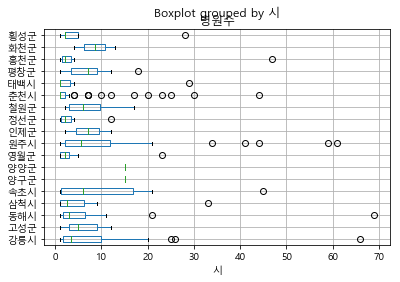

In [31]:
medical_count.boxplot(column = "병원수", vert=False, by = "시")

In [32]:
"""
medical_count.groupby("시").plot(x="시군구동읍면명", y="병원수")
budongsan_price.groupby("시").plot(x="동읍면", y="평당 가격(만원)")
"""

'\nmedical_count.groupby("시").plot(x="시군구동읍면명", y="병원수")\nbudongsan_price.groupby("시").plot(x="동읍면", y="평당 가격(만원)")\n'

In [33]:
medical_count

,시군구동읍면명,병원수,시
0,강릉시 교1동,5,강릉시
1,강릉시 교2동,4,강릉시
2,강릉시 교동,18,강릉시
3,강릉시 금학동,20,강릉시
4,강릉시 난곡동,1,강릉시
5,강릉시 남문동,2,강릉시
6,강릉시 내곡동,2,강릉시
7,강릉시 노암동,2,강릉시
8,강릉시 사천면,1,강릉시
9,강릉시 성남동,9,강릉시


In [34]:
budongsan_price

,대지면적(㎡),평 수,평당 가격(만원)
동읍면,,,
강릉시 강동면,769.631429,232.914286,115.228571
강릉시 강문동,162.384615,48.923077,387.230769
강릉시 견소동,239.000000,72.333333,954.666667
강릉시 교동,231.685344,69.777328,449.222672
강릉시 구정면,497.833333,150.461538,106.205128
강릉시 난곡동,682.250000,206.250000,114.750000
강릉시 남문동,184.727273,55.727273,309.545455
강릉시 남항진동,387.000000,117.000000,111.000000
강릉시 내곡동,349.188000,105.360000,433.180000


In [35]:
"""
budongsan_price = budongsan_price.reindex()
budongsan_price"""
budongsan_price = budongsan_price.reset_index(drop=False)
budongsan_price

,동읍면,대지면적(㎡),평 수,평당 가격(만원)
0,강릉시 강동면,769.631429,232.914286,115.228571
1,강릉시 강문동,162.384615,48.923077,387.230769
2,강릉시 견소동,239.000000,72.333333,954.666667
3,강릉시 교동,231.685344,69.777328,449.222672
4,강릉시 구정면,497.833333,150.461538,106.205128
5,강릉시 난곡동,682.250000,206.250000,114.750000
6,강릉시 남문동,184.727273,55.727273,309.545455
7,강릉시 남항진동,387.000000,117.000000,111.000000
8,강릉시 내곡동,349.188000,105.360000,433.180000
9,강릉시 노암동,166.362689,50.058824,231.747899


In [36]:
budongsan_price['시'] = budongsan_price['동읍면'].str.extract('(\w{3})')
budongsan_price

,동읍면,대지면적(㎡),평 수,평당 가격(만원),시
0,강릉시 강동면,769.631429,232.914286,115.228571,강릉시
1,강릉시 강문동,162.384615,48.923077,387.230769,강릉시
2,강릉시 견소동,239.000000,72.333333,954.666667,강릉시
3,강릉시 교동,231.685344,69.777328,449.222672,강릉시
4,강릉시 구정면,497.833333,150.461538,106.205128,강릉시
5,강릉시 난곡동,682.250000,206.250000,114.750000,강릉시
6,강릉시 남문동,184.727273,55.727273,309.545455,강릉시
7,강릉시 남항진동,387.000000,117.000000,111.000000,강릉시
8,강릉시 내곡동,349.188000,105.360000,433.180000,강릉시
9,강릉시 노암동,166.362689,50.058824,231.747899,강릉시


C:\Users\Playdata\Anaconda3\lib\site-packages\matplotlib\pyplot.py:522: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


시
강릉시    AxesSubplot(0.125,0.125;0.775x0.755)
고성군    AxesSubplot(0.125,0.125;0.775x0.755)
동해시    AxesSubplot(0.125,0.125;0.775x0.755)
삼척시    AxesSubplot(0.125,0.125;0.775x0.755)
속초시    AxesSubplot(0.125,0.125;0.775x0.755)
양구군    AxesSubplot(0.125,0.125;0.775x0.755)
양양군    AxesSubplot(0.125,0.125;0.775x0.755)
영월군    AxesSubplot(0.125,0.125;0.775x0.755)
원주시    AxesSubplot(0.125,0.125;0.775x0.755)
인제군    AxesSubplot(0.125,0.125;0.775x0.755)
정선군    AxesSubplot(0.125,0.125;0.775x0.755)
철원군    AxesSubplot(0.125,0.125;0.775x0.755)
춘천시    AxesSubplot(0.125,0.125;0.775x0.755)
태백시    AxesSubplot(0.125,0.125;0.775x0.755)
평창군    AxesSubplot(0.125,0.125;0.775x0.755)
홍천군    AxesSubplot(0.125,0.125;0.775x0.755)
화천군    AxesSubplot(0.125,0.125;0.775x0.755)
횡성군    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

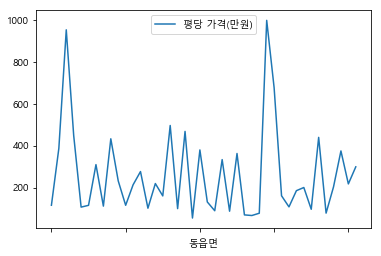

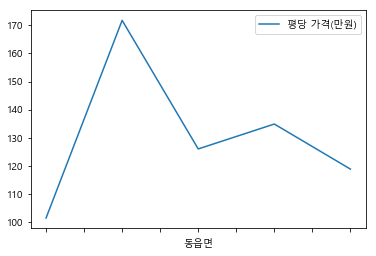

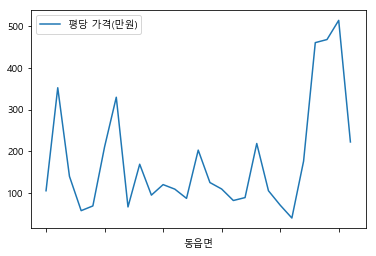

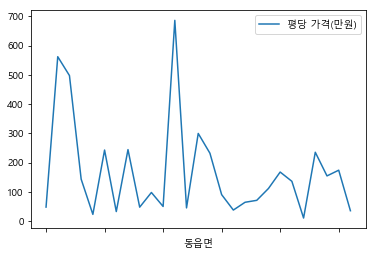

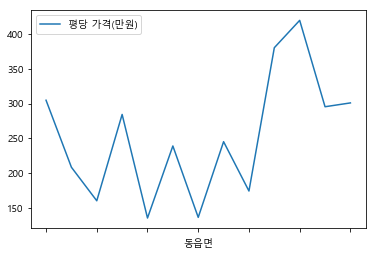

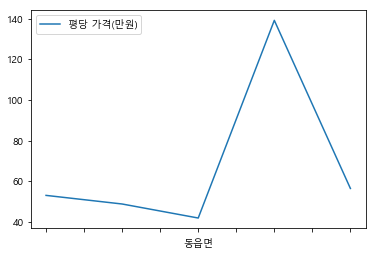

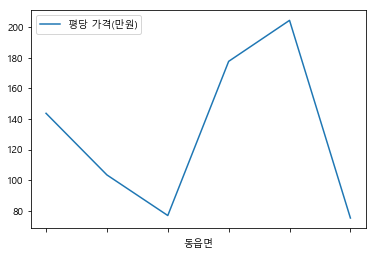

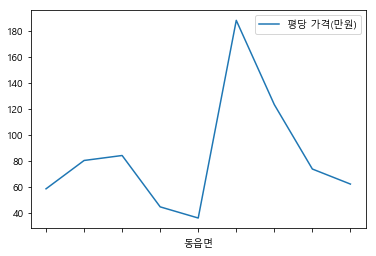

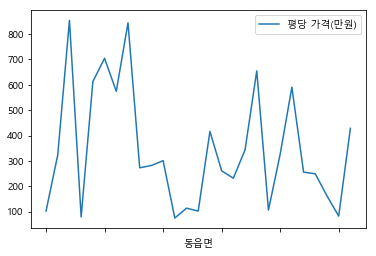

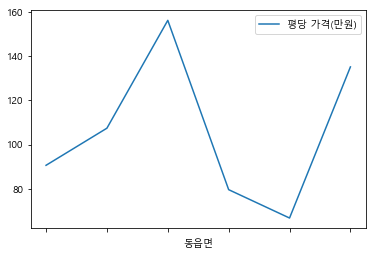

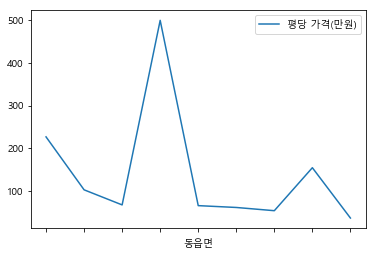

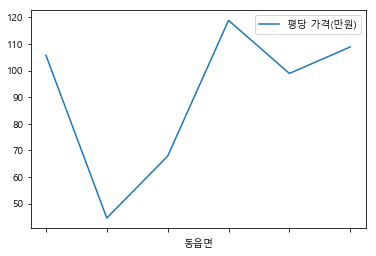

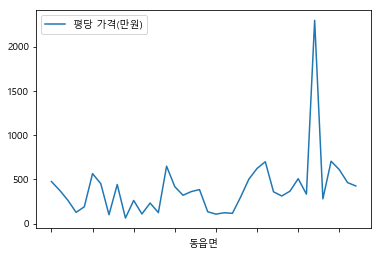

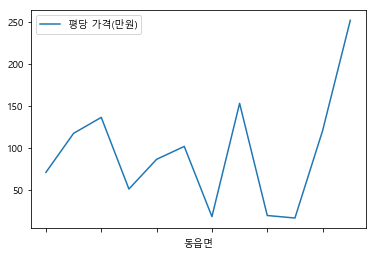

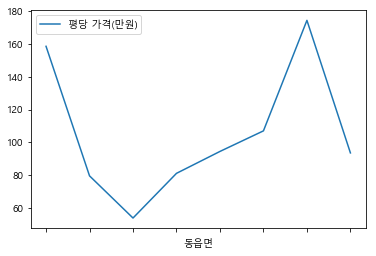

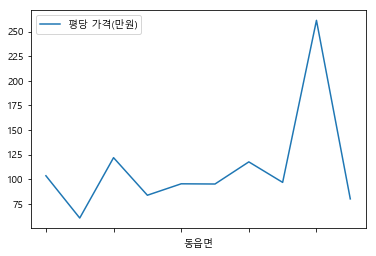

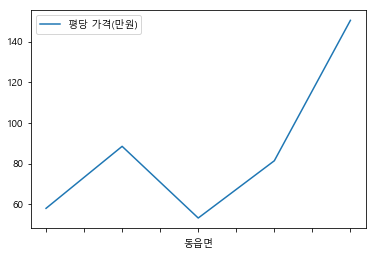

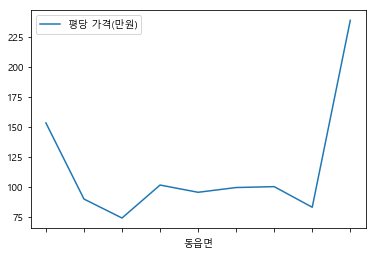

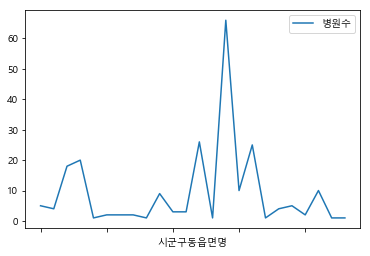

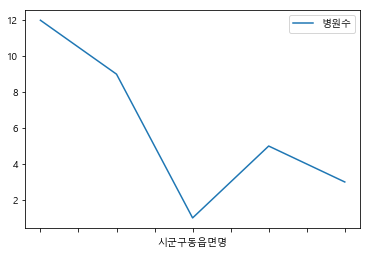

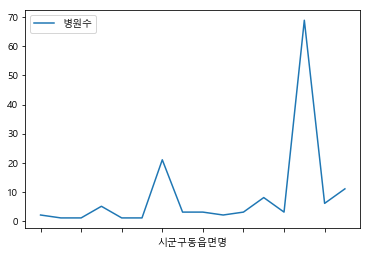

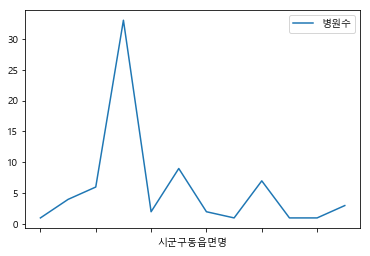

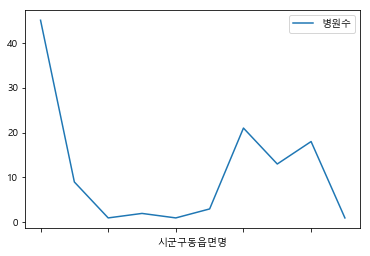

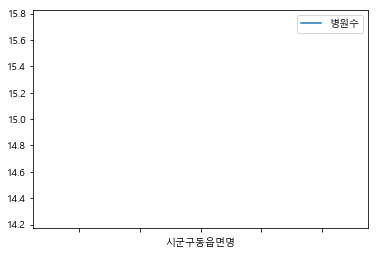

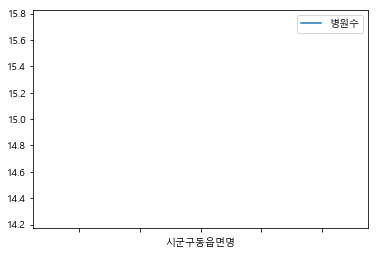

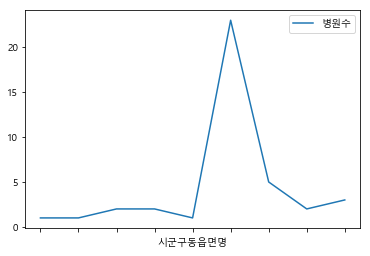

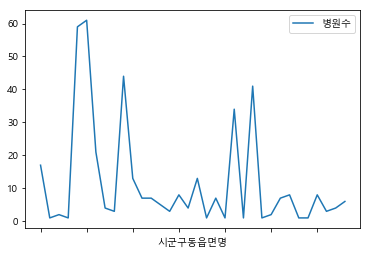

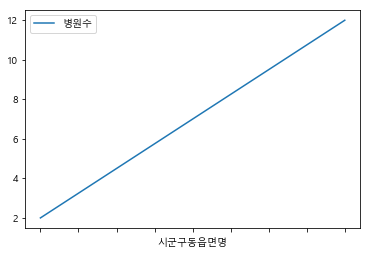

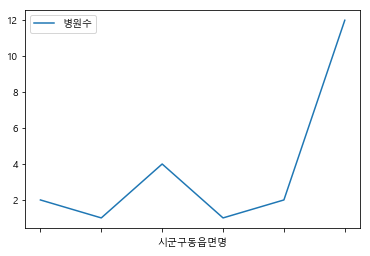

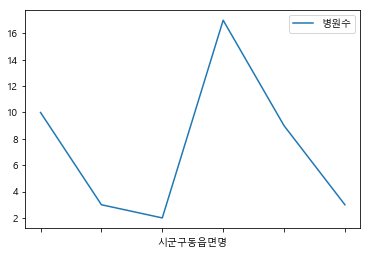

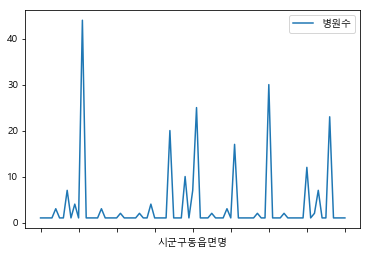

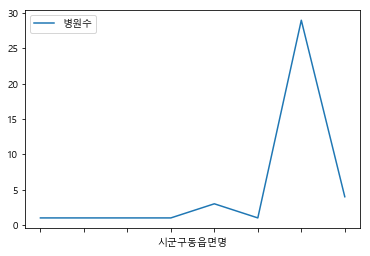

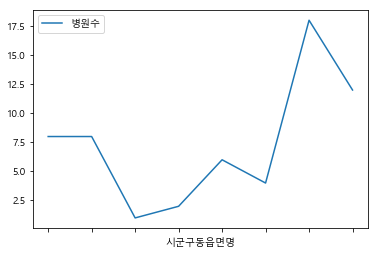

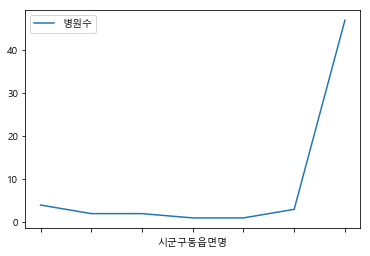

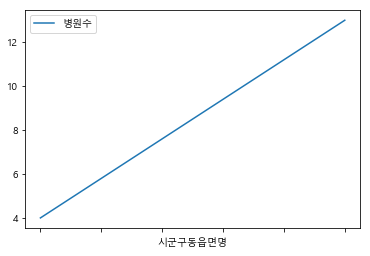

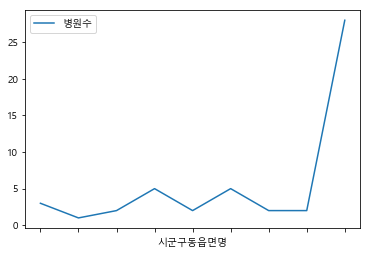

In [37]:
budongsan_price.groupby("시").plot(x="동읍면", y="평당 가격(만원)")
medical_count.groupby("시").plot(x="시군구동읍면명", y="병원수")


In [38]:
pd.merge(budongsan_price, medical_count, left_on = '동읍면', right_on = '시군구동읍면명')

,동읍면,대지면적(㎡),평 수,평당 가격(만원),시_x,시군구동읍면명,병원수,시_y
0,강릉시 교동,231.685344,69.777328,449.222672,강릉시,강릉시 교동,18,강릉시
1,강릉시 난곡동,682.250000,206.250000,114.750000,강릉시,강릉시 난곡동,1,강릉시
2,강릉시 남문동,184.727273,55.727273,309.545455,강릉시,강릉시 남문동,2,강릉시
3,강릉시 내곡동,349.188000,105.360000,433.180000,강릉시,강릉시 내곡동,2,강릉시
4,강릉시 노암동,166.362689,50.058824,231.747899,강릉시,강릉시 노암동,2,강릉시
5,강릉시 사천면,510.753261,154.391304,159.804348,강릉시,강릉시 사천면,1,강릉시
6,강릉시 성남동,155.764706,46.647059,496.882353,강릉시,강릉시 성남동,9,강릉시
7,강릉시 옥계면,422.559744,127.717949,88.948718,강릉시,강릉시 옥계면,3,강릉시
8,강릉시 옥천동,196.863793,59.258621,333.534483,강릉시,강릉시 옥천동,26,강릉시
9,강릉시 용강동,301.694375,91.000000,362.812500,강릉시,강릉시 용강동,1,강릉시


In [39]:
medical_budong_merge = pd.merge(budongsan_price, medical_count, how = 'left', left_on = '동읍면', right_on = '시군구동읍면명')
medical_budong_merge

,동읍면,대지면적(㎡),평 수,평당 가격(만원),시_x,시군구동읍면명,병원수,시_y
0,강릉시 강동면,769.631429,232.914286,115.228571,강릉시,NaN,NaN,NaN
1,강릉시 강문동,162.384615,48.923077,387.230769,강릉시,NaN,NaN,NaN
2,강릉시 견소동,239.000000,72.333333,954.666667,강릉시,NaN,NaN,NaN
3,강릉시 교동,231.685344,69.777328,449.222672,강릉시,강릉시 교동,18.0,강릉시
4,강릉시 구정면,497.833333,150.461538,106.205128,강릉시,NaN,NaN,NaN
5,강릉시 난곡동,682.250000,206.250000,114.750000,강릉시,강릉시 난곡동,1.0,강릉시
6,강릉시 남문동,184.727273,55.727273,309.545455,강릉시,강릉시 남문동,2.0,강릉시
7,강릉시 남항진동,387.000000,117.000000,111.000000,강릉시,NaN,NaN,NaN
8,강릉시 내곡동,349.188000,105.360000,433.180000,강릉시,강릉시 내곡동,2.0,강릉시
9,강릉시 노암동,166.362689,50.058824,231.747899,강릉시,강릉시 노암동,2.0,강릉시


In [40]:
del medical_budong_merge['시군구동읍면명']
del medical_budong_merge['시_y']
medical_budong_merge

,동읍면,대지면적(㎡),평 수,평당 가격(만원),시_x,병원수
0,강릉시 강동면,769.631429,232.914286,115.228571,강릉시,NaN
1,강릉시 강문동,162.384615,48.923077,387.230769,강릉시,NaN
2,강릉시 견소동,239.000000,72.333333,954.666667,강릉시,NaN
3,강릉시 교동,231.685344,69.777328,449.222672,강릉시,18.0
4,강릉시 구정면,497.833333,150.461538,106.205128,강릉시,NaN
5,강릉시 난곡동,682.250000,206.250000,114.750000,강릉시,1.0
6,강릉시 남문동,184.727273,55.727273,309.545455,강릉시,2.0
7,강릉시 남항진동,387.000000,117.000000,111.000000,강릉시,NaN
8,강릉시 내곡동,349.188000,105.360000,433.180000,강릉시,2.0
9,강릉시 노암동,166.362689,50.058824,231.747899,강릉시,2.0


In [41]:
medical_budong_merge = medical_budong_merge.fillna(0)
medical_budong_merge

,동읍면,대지면적(㎡),평 수,평당 가격(만원),시_x,병원수
0,강릉시 강동면,769.631429,232.914286,115.228571,강릉시,0.0
1,강릉시 강문동,162.384615,48.923077,387.230769,강릉시,0.0
2,강릉시 견소동,239.000000,72.333333,954.666667,강릉시,0.0
3,강릉시 교동,231.685344,69.777328,449.222672,강릉시,18.0
4,강릉시 구정면,497.833333,150.461538,106.205128,강릉시,0.0
5,강릉시 난곡동,682.250000,206.250000,114.750000,강릉시,1.0
6,강릉시 남문동,184.727273,55.727273,309.545455,강릉시,2.0
7,강릉시 남항진동,387.000000,117.000000,111.000000,강릉시,0.0
8,강릉시 내곡동,349.188000,105.360000,433.180000,강릉시,2.0
9,강릉시 노암동,166.362689,50.058824,231.747899,강릉시,2.0


In [42]:
medical_budong_merge.rename(columns={'시_x': '시'}, inplace=True)
medical_budong_merge

,동읍면,대지면적(㎡),평 수,평당 가격(만원),시,병원수
0,강릉시 강동면,769.631429,232.914286,115.228571,강릉시,0.0
1,강릉시 강문동,162.384615,48.923077,387.230769,강릉시,0.0
2,강릉시 견소동,239.000000,72.333333,954.666667,강릉시,0.0
3,강릉시 교동,231.685344,69.777328,449.222672,강릉시,18.0
4,강릉시 구정면,497.833333,150.461538,106.205128,강릉시,0.0
5,강릉시 난곡동,682.250000,206.250000,114.750000,강릉시,1.0
6,강릉시 남문동,184.727273,55.727273,309.545455,강릉시,2.0
7,강릉시 남항진동,387.000000,117.000000,111.000000,강릉시,0.0
8,강릉시 내곡동,349.188000,105.360000,433.180000,강릉시,2.0
9,강릉시 노암동,166.362689,50.058824,231.747899,강릉시,2.0


In [43]:
del medical_budong_merge['대지면적(㎡)']

In [44]:
del medical_budong_merge['평 수']

In [45]:
    medical_budong_merge

,동읍면,평당 가격(만원),시,병원수
0,강릉시 강동면,115.228571,강릉시,0.0
1,강릉시 강문동,387.230769,강릉시,0.0
2,강릉시 견소동,954.666667,강릉시,0.0
3,강릉시 교동,449.222672,강릉시,18.0
4,강릉시 구정면,106.205128,강릉시,0.0
5,강릉시 난곡동,114.750000,강릉시,1.0
6,강릉시 남문동,309.545455,강릉시,2.0
7,강릉시 남항진동,111.000000,강릉시,0.0
8,강릉시 내곡동,433.180000,강릉시,2.0
9,강릉시 노암동,231.747899,강릉시,2.0


In [46]:
df2=medical_budong_merge['병원수'].astype(int)

In [47]:
medical_budong_merge['병원수']=df2

In [48]:
medical_budong_merge

,동읍면,평당 가격(만원),시,병원수
0,강릉시 강동면,115.228571,강릉시,0
1,강릉시 강문동,387.230769,강릉시,0
2,강릉시 견소동,954.666667,강릉시,0
3,강릉시 교동,449.222672,강릉시,18
4,강릉시 구정면,106.205128,강릉시,0
5,강릉시 난곡동,114.750000,강릉시,1
6,강릉시 남문동,309.545455,강릉시,2
7,강릉시 남항진동,111.000000,강릉시,0
8,강릉시 내곡동,433.180000,강릉시,2
9,강릉시 노암동,231.747899,강릉시,2


In [49]:
medical_budong_merge.groupby("시").groups

{'강릉시': Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
             17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
             34, 35, 36, 37, 38, 39, 40, 41],
            dtype='int64'),
 '고성군': Int64Index([42, 43, 44, 45, 46], dtype='int64'),
 '동해시': Int64Index([47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
             64, 65, 66, 67, 68, 69, 70, 71, 72, 73],
            dtype='int64'),
 '삼척시': Int64Index([ 74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,
              87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99,
             100],
            dtype='int64'),
 '속초시': Int64Index([101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113], dtype='int64'),
 '양구군': Int64Index([114, 115, 116, 117, 118], dtype='int64'),
 '양양군': Int64Index([119, 120, 121, 122, 123, 124], dtype='int64'),
 '영월군': Int64Index([125, 126, 127, 128, 129, 130, 131, 132, 133], dtype='int64'),
 '원주시':

In [50]:
d = medical_budong_merge.groupby("시")
for name, groupname in d:
    print(name, groupname)

강릉시          동읍면    평당 가격(만원)    시  병원수
0    강릉시 강동면   115.228571  강릉시    0
1    강릉시 강문동   387.230769  강릉시    0
2    강릉시 견소동   954.666667  강릉시    0
3     강릉시 교동   449.222672  강릉시   18
4    강릉시 구정면   106.205128  강릉시    0
5    강릉시 난곡동   114.750000  강릉시    1
6    강릉시 남문동   309.545455  강릉시    2
7   강릉시 남항진동   111.000000  강릉시    0
8    강릉시 내곡동   433.180000  강릉시    2
9    강릉시 노암동   231.747899  강릉시    2
10   강릉시 담산동   115.000000  강릉시    0
11   강릉시 대전동   212.857143  강릉시    0
12   강릉시 명주동   276.375000  강릉시    0
13   강릉시 박월동   101.000000  강릉시    0
14   강릉시 병산동   219.000000  강릉시    0
15   강릉시 사천면   159.804348  강릉시    1
16   강릉시 성남동   496.882353  강릉시    9
17   강릉시 성산면    99.021277  강릉시    0
18   강릉시 송정동   468.500000  강릉시    0
19   강릉시 신석동    54.000000  강릉시    0
20   강릉시 안현동   379.857143  강릉시    0
21   강릉시 연곡면   130.846154  강릉시    0
22   강릉시 옥계면    88.948718  강릉시    3
23   강릉시 옥천동   333.534483  강릉시   26
24   강릉시 왕산면    86.642857  강릉시    0
25   강릉시 용강동   362.812500  강릉시    1
26   강릉시 운산동    69.00000

In [51]:
"""
plt.figure(figsize=(15,5))
medical_budong_merge.groupby("시")
.plt.plot(medical_budong_merge.동읍면, medical_budong_merge.병원수, medical_budong_merge.동읍면, medical_budong_merge.병원수, 'r')
plt.title('종합 그래프', size=15)
"""

'\nplt.figure(figsize=(15,5))\nmedical_budong_merge.groupby("시")\n.plt.plot(medical_budong_merge.동읍면, medical_budong_merge.병원수, medical_budong_merge.동읍면, medical_budong_merge.병원수, \'r\')\nplt.title(\'종합 그래프\', size=15)\n'

In [52]:
print(medical_budong_merge.groupby('시')['병원수'])

# 범죄 데이터 전처리

# 16년도 검거율 

In [53]:
crime16 = pd.read_csv('crime16.csv', encoding = 'UTF-8', header=None)
crime16

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,경찰서별,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016
1,경찰서별,합계,합계,강력범,강력범,절도범,절도범,폭력범,폭력범,지능범,지능범,풍속범,풍속범,기타형사범,기타형사범,특별법범,특별법범
2,경찰서별,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거,발생,검거
3,합계,58815,49509,706,671,5165,3568,10853,9841,8155,6832,229,188,3333,2987,30374,25422
4,강원청,0,951,0,89,0,9,0,53,0,368,0,3,0,26,0,403
5,춘천경찰서,11225,8820,127,105,1116,646,1818,1551,1314,997,39,35,672,506,6139,4980
6,원주경찰서,14933,12030,144,112,1311,923,2941,2646,2183,1519,50,39,759,648,7545,6143
7,강릉경찰서,7419,6025,108,96,762,469,1824,1595,1194,997,20,16,433,397,3078,2455
8,동해경찰서,3407,2947,47,37,178,143,703,680,362,314,17,10,193,195,1907,1568
9,태백경찰서,1528,1405,18,18,118,95,383,361,179,187,6,5,67,65,757,674


In [54]:
crime16.columns = crime16.iloc[1]
c1=crime16.copy()

In [55]:
del c1['강력범']
del c1['절도범']
del c1['폭력범']
del c1['지능범']
del c1['풍속범']
del c1['기타형사범']
del c1['특별법범']
c1

1,경찰서별,합계,합계
0,경찰서별,2016,2016
1,경찰서별,합계,합계
2,경찰서별,발생,검거
3,합계,58815,49509
4,강원청,0,951
5,춘천경찰서,11225,8820
6,원주경찰서,14933,12030
7,강릉경찰서,7419,6025
8,동해경찰서,3407,2947
9,태백경찰서,1528,1405


In [56]:
c0=c1.copy()

In [57]:
c0.drop([0],inplace=True)
c0.drop([1],inplace=True)
c0.drop([3],inplace=True)
c0.drop([4],inplace=True)

In [58]:
c0

1,경찰서별,합계,합계
2,경찰서별,발생,검거
5,춘천경찰서,11225,8820
6,원주경찰서,14933,12030
7,강릉경찰서,7419,6025
8,동해경찰서,3407,2947
9,태백경찰서,1528,1405
10,속초경찰서,4828,3990
11,삼척경찰서,3078,2587
12,홍천경찰서,2758,2396
13,횡성경찰서,1369,1183


In [59]:
c0.columns=c0.iloc[0]
c0.drop([2],inplace=True)


In [60]:
c0

2,경찰서별,발생,검거
5,춘천경찰서,11225,8820
6,원주경찰서,14933,12030
7,강릉경찰서,7419,6025
8,동해경찰서,3407,2947
9,태백경찰서,1528,1405
10,속초경찰서,4828,3990
11,삼척경찰서,3078,2587
12,홍천경찰서,2758,2396
13,횡성경찰서,1369,1183
14,영월경찰서,1063,904


In [61]:
c1=c0.reset_index(drop=True)

In [62]:
del c1['검거']
c1['발생건수(백 건)']=c1['발생'].astype(int)/100
c1
del c1['발생']
c1

2,경찰서별,발생건수(백 건)
0,춘천경찰서,112.25
1,원주경찰서,149.33
2,강릉경찰서,74.19
3,동해경찰서,34.07
4,태백경찰서,15.28
5,속초경찰서,48.28
6,삼척경찰서,30.78
7,홍천경찰서,27.58
8,횡성경찰서,13.69
9,영월경찰서,10.63


In [63]:
crime=c1.copy()

In [64]:
crime.set_value(0,'경찰서별', "춘천시")
crime.set_value(1,'경찰서별', "원주시")
crime.set_value(2,'경찰서별', "강릉시")
crime.set_value(3,'경찰서별', "동해시")
crime.set_value(4,'경찰서별', "태백시")
crime.set_value(5,'경찰서별', "속초시")
crime.set_value(6,'경찰서별', "삼척시")
crime.set_value(7,'경찰서별', "홍천군")
crime.set_value(8,'경찰서별', "횡성군")
crime.set_value(9,'경찰서별', "영월군")
crime.set_value(10,'경찰서별', "평창군")
crime.set_value(11,'경찰서별', "정선군")
crime.set_value(12,'경찰서별', "철원군")
crime.set_value(13,'경찰서별', "화천군")
crime.set_value(14,'경찰서별', "양구군")
crime.set_value(15,'경찰서별', "인제군")
crime.set_value(16,'경찰서별', "고성군")


crime

C:\Users\Playdata\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """Entry point for launching an IPython kernel.
C:\Users\Playdata\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Playdata\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Playdata\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.
C:\Users\Playdata\Anaconda3\lib\site-pack

2,경찰서별,발생건수(백 건)
0,춘천시,112.25
1,원주시,149.33
2,강릉시,74.19
3,동해시,34.07
4,태백시,15.28
5,속초시,48.28
6,삼척시,30.78
7,홍천군,27.58
8,횡성군,13.69
9,영월군,10.63


In [65]:
crime #15, 16년도의 평균 검거율

2,경찰서별,발생건수(백 건)
0,춘천시,112.25
1,원주시,149.33
2,강릉시,74.19
3,동해시,34.07
4,태백시,15.28
5,속초시,48.28
6,삼척시,30.78
7,홍천군,27.58
8,횡성군,13.69
9,영월군,10.63


# 학군 데이터 전처리 

In [66]:
data = pd.read_csv("edu.csv", encoding = 'utf-8')
data

,시도명,시군구명,학교ID,학교명,학교급구분,설립일자,설립형태,본교분교구분,운영상태,소재지지번주소,소재지도로명주소,시도교육청코드,시도교육청명,교육지원청코드,교육지원청명,생성일자,변경일자,위도,경도,데이터기준일자
0,강원도,춘천시,B000004852,가산초등학교,초등학교,1936-09-15,공립,본교,운영,강원도 춘천시 동면 지내리 136-2,강원도 춘천시 동면 가산로 52,7800000,강원도교육청,7811000,강원도춘천교육지원청,2013-11-29,NaN,37.908693,127.782582,2017-09-05
1,강원도,춘천시,B000004853,만천초등학교,초등학교,1953-04-16,공립,본교,운영,강원도 춘천시 동면 만천리 978,강원도 춘천시 동면 후석로326번길 89,7800000,강원도교육청,7811000,강원도춘천교육지원청,2013-11-29,NaN,37.884272,127.757925,2017-09-05
2,강원도,춘천시,B000004854,지촌초등학교,초등학교,1929-04-01,공립,본교,운영,강원도 춘천시 사북면 지촌리 347,강원도 춘천시 사북면 지촌길 130,7800000,강원도교육청,7811000,강원도춘천교육지원청,2013-11-29,NaN,38.037954,127.644885,2017-09-05
3,강원도,춘천시,B000004855,동내초등학교,초등학교,1948-04-15,공립,본교,운영,강원도 춘천시 동내면 신촌리 491,강원도 춘천시 동내면 동내로 131,7800000,강원도교육청,7811000,강원도춘천교육지원청,2013-11-29,NaN,37.851133,127.766235,2017-09-05
4,강원도,춘천시,B000004856,남산초등학교,초등학교,1922-11-22,공립,본교,운영,강원도 춘천시 남산면 방곡리 126-2,강원도 춘천시 남산면 한치로 59,7800000,강원도교육청,7811000,강원도춘천교육지원청,2013-11-29,NaN,37.792841,127.645669,2017-09-05
5,강원도,춘천시,B000004857,춘천삼육초등학교,초등학교,1972-05-02,사립,본교,운영,강원도 춘천시 동면 장학리 568-1,강원도 춘천시 동면 방죽길 56-10,7800000,강원도교육청,7811000,강원도춘천교육지원청,2013-11-29,NaN,37.911077,127.753679,2017-09-05
6,강원도,춘천시,B000004858,송화초등학교,초등학교,1934-05-10,공립,본교,운영,강원도 춘천시 사북면 고탄리 126-1,NaN,7800000,강원도교육청,7811000,강원도춘천교육지원청,2013-11-29,NaN,37.987620,127.707605,2017-09-05
7,강원도,춘천시,B000004859,광판초등학교,초등학교,1936-06-08,공립,본교,운영,강원도 춘천시 남산면 광판리 628,강원도 춘천시 남산면 김유정로 159-12,7800000,강원도교육청,7811000,강원도춘천교육지원청,2013-11-29,NaN,37.730659,127.698828,2017-09-05
8,강원도,춘천시,B000004860,추곡초등학교,초등학교,1963-03-01,공립,본교,운영,강원도 춘천시 북산면 추곡리 562,강원도 춘천시 북산면 북산로 34,7800000,강원도교육청,7811000,강원도춘천교육지원청,2013-11-29,NaN,38.024467,127.882346,2017-09-05
9,강원도,춘천시,B000004861,지촌초등학교지암분교장,초등학교,1941-01-01,공립,분교,운영,강원도 춘천시 사북면 지암리 308,강원도 춘천시 사북면 화악지암길 431,7800000,강원도교육청,7811000,강원도춘천교육지원청,2013-11-29,NaN,37.981211,127.607172,2017-09-05


In [67]:
del data['학교ID']
del data['학교명']
del data['설립일자']
del data['본교분교구분']
del data['운영상태']
del data['소재지도로명주소']
del data['시도교육청코드']
del data['시도교육청명']
del data['교육지원청코드']
del data['교육지원청명']
del data['생성일자']
del data['변경일자']
del data['위도']
del data['경도']
del data['데이터기준일자']
del data['설립형태']

data

,시도명,시군구명,학교급구분,소재지지번주소
0,강원도,춘천시,초등학교,강원도 춘천시 동면 지내리 136-2
1,강원도,춘천시,초등학교,강원도 춘천시 동면 만천리 978
2,강원도,춘천시,초등학교,강원도 춘천시 사북면 지촌리 347
3,강원도,춘천시,초등학교,강원도 춘천시 동내면 신촌리 491
4,강원도,춘천시,초등학교,강원도 춘천시 남산면 방곡리 126-2
5,강원도,춘천시,초등학교,강원도 춘천시 동면 장학리 568-1
6,강원도,춘천시,초등학교,강원도 춘천시 사북면 고탄리 126-1
7,강원도,춘천시,초등학교,강원도 춘천시 남산면 광판리 628
8,강원도,춘천시,초등학교,강원도 춘천시 북산면 추곡리 562
9,강원도,춘천시,초등학교,강원도 춘천시 사북면 지암리 308


In [68]:
data

,시도명,시군구명,학교급구분,소재지지번주소
0,강원도,춘천시,초등학교,강원도 춘천시 동면 지내리 136-2
1,강원도,춘천시,초등학교,강원도 춘천시 동면 만천리 978
2,강원도,춘천시,초등학교,강원도 춘천시 사북면 지촌리 347
3,강원도,춘천시,초등학교,강원도 춘천시 동내면 신촌리 491
4,강원도,춘천시,초등학교,강원도 춘천시 남산면 방곡리 126-2
5,강원도,춘천시,초등학교,강원도 춘천시 동면 장학리 568-1
6,강원도,춘천시,초등학교,강원도 춘천시 사북면 고탄리 126-1
7,강원도,춘천시,초등학교,강원도 춘천시 남산면 광판리 628
8,강원도,춘천시,초등학교,강원도 춘천시 북산면 추곡리 562
9,강원도,춘천시,초등학교,강원도 춘천시 사북면 지암리 308


In [69]:
data['동읍면']= [eachAddress.split()[2] for eachAddress in data['소재지지번주소']]
data

,시도명,시군구명,학교급구분,소재지지번주소,동읍면
0,강원도,춘천시,초등학교,강원도 춘천시 동면 지내리 136-2,동면
1,강원도,춘천시,초등학교,강원도 춘천시 동면 만천리 978,동면
2,강원도,춘천시,초등학교,강원도 춘천시 사북면 지촌리 347,사북면
3,강원도,춘천시,초등학교,강원도 춘천시 동내면 신촌리 491,동내면
4,강원도,춘천시,초등학교,강원도 춘천시 남산면 방곡리 126-2,남산면
5,강원도,춘천시,초등학교,강원도 춘천시 동면 장학리 568-1,동면
6,강원도,춘천시,초등학교,강원도 춘천시 사북면 고탄리 126-1,사북면
7,강원도,춘천시,초등학교,강원도 춘천시 남산면 광판리 628,남산면
8,강원도,춘천시,초등학교,강원도 춘천시 북산면 추곡리 562,북산면
9,강원도,춘천시,초등학교,강원도 춘천시 사북면 지암리 308,사북면


In [70]:
data['동읍면2'] = data['시군구명'].map(str) + " " + data['동읍면'].map(str)
data

,시도명,시군구명,학교급구분,소재지지번주소,동읍면,동읍면2
0,강원도,춘천시,초등학교,강원도 춘천시 동면 지내리 136-2,동면,춘천시 동면
1,강원도,춘천시,초등학교,강원도 춘천시 동면 만천리 978,동면,춘천시 동면
2,강원도,춘천시,초등학교,강원도 춘천시 사북면 지촌리 347,사북면,춘천시 사북면
3,강원도,춘천시,초등학교,강원도 춘천시 동내면 신촌리 491,동내면,춘천시 동내면
4,강원도,춘천시,초등학교,강원도 춘천시 남산면 방곡리 126-2,남산면,춘천시 남산면
5,강원도,춘천시,초등학교,강원도 춘천시 동면 장학리 568-1,동면,춘천시 동면
6,강원도,춘천시,초등학교,강원도 춘천시 사북면 고탄리 126-1,사북면,춘천시 사북면
7,강원도,춘천시,초등학교,강원도 춘천시 남산면 광판리 628,남산면,춘천시 남산면
8,강원도,춘천시,초등학교,강원도 춘천시 북산면 추곡리 562,북산면,춘천시 북산면
9,강원도,춘천시,초등학교,강원도 춘천시 사북면 지암리 308,사북면,춘천시 사북면


In [71]:
del data['동읍면']

In [72]:
df=data.copy()

In [73]:
df=df.groupby(['동읍면2']).size().reset_index(name='학교 수')

In [74]:
df

,동읍면2,학교 수
0,강릉시 강동면,3
1,강릉시 교동,10
2,강릉시 구정면,3
3,강릉시 내곡동,1
4,강릉시 노암동,2
5,강릉시 사천면,3
6,강릉시 성산면,2
7,강릉시 송정동,1
8,강릉시 안현동,1
9,강릉시 연곡면,2


In [75]:
medical_budong_merge = pd.merge(medical_budong_merge, df, how = 'left', left_on = '동읍면', right_on = '동읍면2')
medical_budong_merge

,동읍면,평당 가격(만원),시,병원수,동읍면2,학교 수
0,강릉시 강동면,115.228571,강릉시,0,강릉시 강동면,3.0
1,강릉시 강문동,387.230769,강릉시,0,NaN,NaN
2,강릉시 견소동,954.666667,강릉시,0,NaN,NaN
3,강릉시 교동,449.222672,강릉시,18,강릉시 교동,10.0
4,강릉시 구정면,106.205128,강릉시,0,강릉시 구정면,3.0
5,강릉시 난곡동,114.750000,강릉시,1,NaN,NaN
6,강릉시 남문동,309.545455,강릉시,2,NaN,NaN
7,강릉시 남항진동,111.000000,강릉시,0,NaN,NaN
8,강릉시 내곡동,433.180000,강릉시,2,강릉시 내곡동,1.0
9,강릉시 노암동,231.747899,강릉시,2,강릉시 노암동,2.0


In [76]:
medical_budong_merge = medical_budong_merge.fillna(0)
medical_budong_merge

,동읍면,평당 가격(만원),시,병원수,동읍면2,학교 수
0,강릉시 강동면,115.228571,강릉시,0,강릉시 강동면,3.0
1,강릉시 강문동,387.230769,강릉시,0,0,0.0
2,강릉시 견소동,954.666667,강릉시,0,0,0.0
3,강릉시 교동,449.222672,강릉시,18,강릉시 교동,10.0
4,강릉시 구정면,106.205128,강릉시,0,강릉시 구정면,3.0
5,강릉시 난곡동,114.750000,강릉시,1,0,0.0
6,강릉시 남문동,309.545455,강릉시,2,0,0.0
7,강릉시 남항진동,111.000000,강릉시,0,0,0.0
8,강릉시 내곡동,433.180000,강릉시,2,강릉시 내곡동,1.0
9,강릉시 노암동,231.747899,강릉시,2,강릉시 노암동,2.0


In [77]:
del medical_budong_merge['동읍면2']

In [78]:
df2=medical_budong_merge['학교 수'].astype(int)

In [79]:
medical_budong_merge['학교 수']=df2

In [80]:
medical_budong_merge

,동읍면,평당 가격(만원),시,병원수,학교 수
0,강릉시 강동면,115.228571,강릉시,0,3
1,강릉시 강문동,387.230769,강릉시,0,0
2,강릉시 견소동,954.666667,강릉시,0,0
3,강릉시 교동,449.222672,강릉시,18,10
4,강릉시 구정면,106.205128,강릉시,0,3
5,강릉시 난곡동,114.750000,강릉시,1,0
6,강릉시 남문동,309.545455,강릉시,2,0
7,강릉시 남항진동,111.000000,강릉시,0,0
8,강릉시 내곡동,433.180000,강릉시,2,1
9,강릉시 노암동,231.747899,강릉시,2,2


In [81]:

crime

2,경찰서별,발생건수(백 건)
0,춘천시,112.25
1,원주시,149.33
2,강릉시,74.19
3,동해시,34.07
4,태백시,15.28
5,속초시,48.28
6,삼척시,30.78
7,홍천군,27.58
8,횡성군,13.69
9,영월군,10.63


In [82]:
medical_budong_merge

,동읍면,평당 가격(만원),시,병원수,학교 수
0,강릉시 강동면,115.228571,강릉시,0,3
1,강릉시 강문동,387.230769,강릉시,0,0
2,강릉시 견소동,954.666667,강릉시,0,0
3,강릉시 교동,449.222672,강릉시,18,10
4,강릉시 구정면,106.205128,강릉시,0,3
5,강릉시 난곡동,114.750000,강릉시,1,0
6,강릉시 남문동,309.545455,강릉시,2,0
7,강릉시 남항진동,111.000000,강릉시,0,0
8,강릉시 내곡동,433.180000,강릉시,2,1
9,강릉시 노암동,231.747899,강릉시,2,2


In [83]:
medical_budong_merge = pd.merge(medical_budong_merge, crime, how = 'left', left_on = '시', right_on = '경찰서별')
medical_budong_merge

,동읍면,평당 가격(만원),시,병원수,학교 수,경찰서별,발생건수(백 건)
0,강릉시 강동면,115.228571,강릉시,0,3,강릉시,74.19
1,강릉시 강문동,387.230769,강릉시,0,0,강릉시,74.19
2,강릉시 견소동,954.666667,강릉시,0,0,강릉시,74.19
3,강릉시 교동,449.222672,강릉시,18,10,강릉시,74.19
4,강릉시 구정면,106.205128,강릉시,0,3,강릉시,74.19
5,강릉시 난곡동,114.750000,강릉시,1,0,강릉시,74.19
6,강릉시 남문동,309.545455,강릉시,2,0,강릉시,74.19
7,강릉시 남항진동,111.000000,강릉시,0,0,강릉시,74.19
8,강릉시 내곡동,433.180000,강릉시,2,1,강릉시,74.19
9,강릉시 노암동,231.747899,강릉시,2,2,강릉시,74.19


In [84]:
medical_budong_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 263
Data columns (total 7 columns):
동읍면          264 non-null object
평당 가격(만원)    264 non-null float64
시            264 non-null object
병원수          264 non-null int32
학교 수         264 non-null int32
경찰서별         258 non-null object
발생건수(백 건)    258 non-null float64
dtypes: float64(2), int32(2), object(3)
memory usage: 14.4+ KB


In [85]:
del medical_budong_merge['경찰서별']

In [86]:
medical_budong_merge

,동읍면,평당 가격(만원),시,병원수,학교 수,발생건수(백 건)
0,강릉시 강동면,115.228571,강릉시,0,3,74.19
1,강릉시 강문동,387.230769,강릉시,0,0,74.19
2,강릉시 견소동,954.666667,강릉시,0,0,74.19
3,강릉시 교동,449.222672,강릉시,18,10,74.19
4,강릉시 구정면,106.205128,강릉시,0,3,74.19
5,강릉시 난곡동,114.750000,강릉시,1,0,74.19
6,강릉시 남문동,309.545455,강릉시,2,0,74.19
7,강릉시 남항진동,111.000000,강릉시,0,0,74.19
8,강릉시 내곡동,433.180000,강릉시,2,1,74.19
9,강릉시 노암동,231.747899,강릉시,2,2,74.19


In [87]:
medical_budong_merge = medical_budong_merge.fillna(81)
medical_budong_merge

,동읍면,평당 가격(만원),시,병원수,학교 수,발생건수(백 건)
0,강릉시 강동면,115.228571,강릉시,0,3,74.19
1,강릉시 강문동,387.230769,강릉시,0,0,74.19
2,강릉시 견소동,954.666667,강릉시,0,0,74.19
3,강릉시 교동,449.222672,강릉시,18,10,74.19
4,강릉시 구정면,106.205128,강릉시,0,3,74.19
5,강릉시 난곡동,114.750000,강릉시,1,0,74.19
6,강릉시 남문동,309.545455,강릉시,2,0,74.19
7,강릉시 남항진동,111.000000,강릉시,0,0,74.19
8,강릉시 내곡동,433.180000,강릉시,2,1,74.19
9,강릉시 노암동,231.747899,강릉시,2,2,74.19


In [88]:
medical_budong_merge.info().afafaop()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264 entries, 0 to 263
Data columns (total 6 columns):
동읍면          264 non-null object
평당 가격(만원)    264 non-null float64
시            264 non-null object
병원수          264 non-null int32
학교 수         264 non-null int32
발생건수(백 건)    264 non-null float64
dtypes: float64(2), int32(2), object(2)
memory usage: 12.4+ KB


AttributeError: 'NoneType' object has no attribute 'afafaop'

In [89]:
df2=medical_budong_merge['평당 가격(만원)'].astype(int)

In [90]:
medical_budong_merge['평당 가격(만원)']=df2

In [91]:
medical_budong_merge

,동읍면,평당 가격(만원),시,병원수,학교 수,발생건수(백 건)
0,강릉시 강동면,115,강릉시,0,3,74.19
1,강릉시 강문동,387,강릉시,0,0,74.19
2,강릉시 견소동,954,강릉시,0,0,74.19
3,강릉시 교동,449,강릉시,18,10,74.19
4,강릉시 구정면,106,강릉시,0,3,74.19
5,강릉시 난곡동,114,강릉시,1,0,74.19
6,강릉시 남문동,309,강릉시,2,0,74.19
7,강릉시 남항진동,111,강릉시,0,0,74.19
8,강릉시 내곡동,433,강릉시,2,1,74.19
9,강릉시 노암동,231,강릉시,2,2,74.19


In [92]:
avg_data=medical_budong_merge.groupby('시').mean()
avg_data

,평당 가격(만원),병원수,학교 수,발생건수(백 건)
시,,,,
강릉시,262.642857,4.333333,1.428571,74.19
고성군,130.000000,6.000000,4.600000,9.85
동해시,177.296296,5.000000,1.000000,34.07
삼척시,167.777778,2.555556,1.555556,30.78
속초시,252.307692,8.538462,1.461538,48.28
양구군,67.600000,3.000000,3.800000,4.66
양양군,129.666667,2.500000,4.000000,81.00
영월군,83.222222,4.444444,3.888889,10.63
원주시,345.666667,12.666667,3.259259,149.33


In [93]:
sum_data=medical_budong_merge.groupby('시').sum()
sum_data

,평당 가격(만원),병원수,학교 수,발생건수(백 건)
시,,,,
강릉시,11031,182,60,3115.98
고성군,650,30,23,49.25
동해시,4787,135,27,919.89
삼척시,4530,69,42,831.06
속초시,3280,111,19,627.64
양구군,338,15,19,23.30
양양군,778,15,24,486.00
영월군,749,40,35,95.67
원주시,9333,342,88,4031.91


In [94]:
avg_data['병원 수']=sum_data['병원수']
avg_data['학교수']=sum_data['학교 수']

In [95]:
del avg_data['병원수']
del avg_data['학교 수']

In [96]:
avg_data

,평당 가격(만원),발생건수(백 건),병원 수,학교수
시,,,,
강릉시,262.642857,74.19,182,60
고성군,130.000000,9.85,30,23
동해시,177.296296,34.07,135,27
삼척시,167.777778,30.78,69,42
속초시,252.307692,48.28,111,19
양구군,67.600000,4.66,15,19
양양군,129.666667,81.00,15,24
영월군,83.222222,10.63,40,35
원주시,345.666667,149.33,342,88


In [97]:
test_data=avg_data.copy()

시
강릉시    AxesSubplot(0.125,0.125;0.775x0.755)
고성군    AxesSubplot(0.125,0.125;0.775x0.755)
동해시    AxesSubplot(0.125,0.125;0.775x0.755)
삼척시    AxesSubplot(0.125,0.125;0.775x0.755)
속초시    AxesSubplot(0.125,0.125;0.775x0.755)
양구군    AxesSubplot(0.125,0.125;0.775x0.755)
양양군    AxesSubplot(0.125,0.125;0.775x0.755)
영월군    AxesSubplot(0.125,0.125;0.775x0.755)
원주시    AxesSubplot(0.125,0.125;0.775x0.755)
인제군    AxesSubplot(0.125,0.125;0.775x0.755)
정선군    AxesSubplot(0.125,0.125;0.775x0.755)
철원군    AxesSubplot(0.125,0.125;0.775x0.755)
춘천시    AxesSubplot(0.125,0.125;0.775x0.755)
태백시    AxesSubplot(0.125,0.125;0.775x0.755)
평창군    AxesSubplot(0.125,0.125;0.775x0.755)
홍천군    AxesSubplot(0.125,0.125;0.775x0.755)
화천군    AxesSubplot(0.125,0.125;0.775x0.755)
횡성군    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

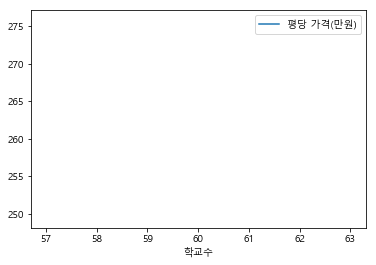

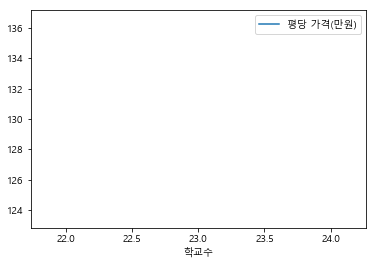

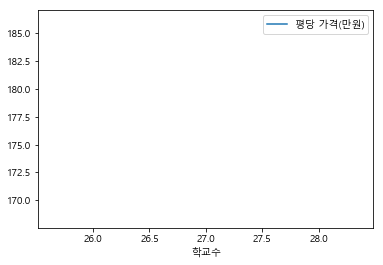

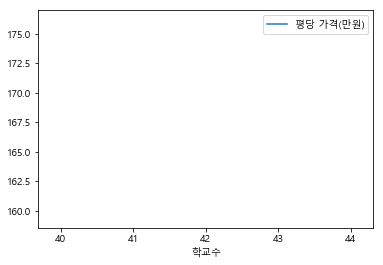

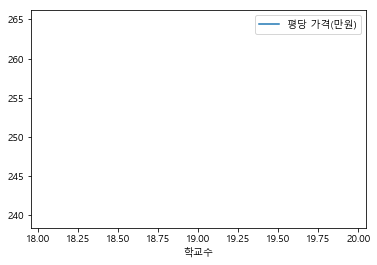

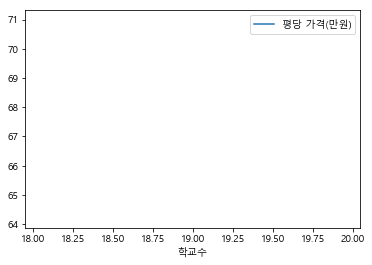

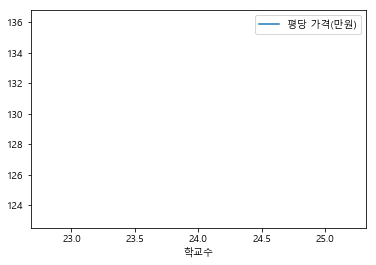

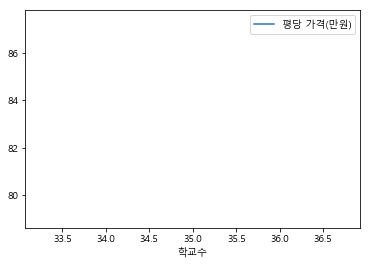

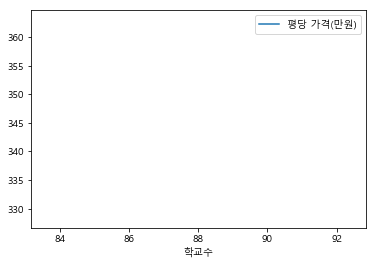

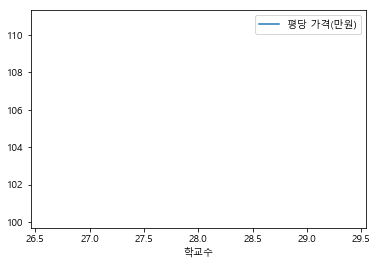

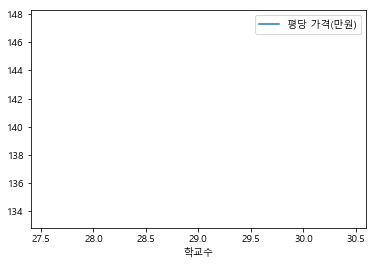

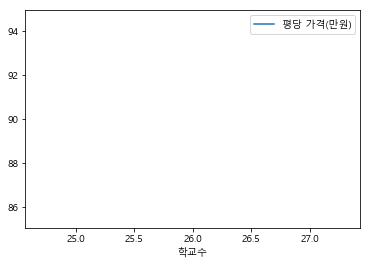

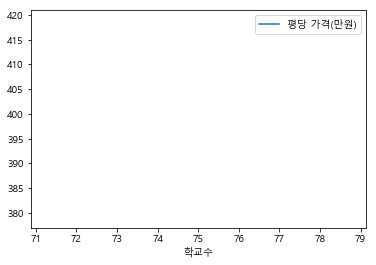

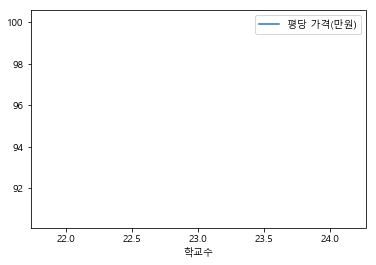

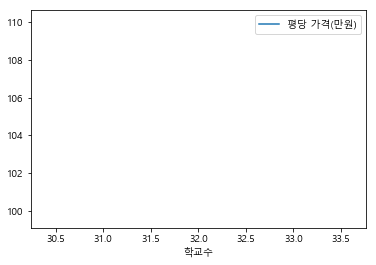

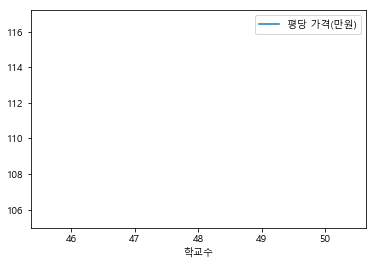

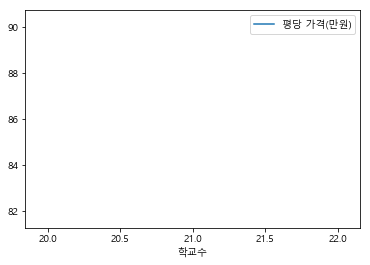

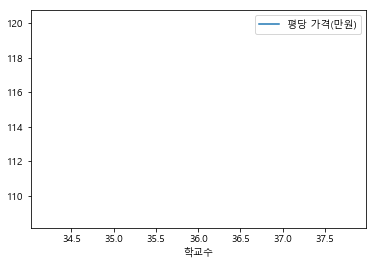

In [100]:
avg_data.groupby("시").plot(x="학교수", y="평당 가격(만원)")

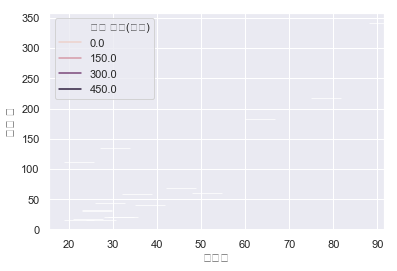

In [101]:
sns.set(style="darkgrid")

# Load an example dataset with long-form data
avg_data

# Plot the responses for different events and regions
sns.lineplot(y="병원 수", x="학교수",
             hue="평당 가격(만원)",marker=True, ms='30',
             data=avg_data)

In [102]:
# Matplotlib에서 한글을 사용하기 위한 설정
from matplotlib import font_manager, rc, rcParams
import matplotlib.pyplot as plt

rcParams['axes.unicode_minus'] = False  # - 기호 깨짐 방지
font_fname = 'C:\\WINDOWS\\Fonts\\D2Coding-Ver1.3.2-20180524.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
print(font_family)
rc('font', family=font_family)

D2Coding


In [103]:
avg_data['평당 가격(십만원)']=avg_data['평당 가격(만원)']/10
avg_data

,평당 가격(만원),발생건수(백 건),병원 수,학교수,평당 가격(십만원)
시,,,,,
강릉시,262.642857,74.19,182,60,26.264286
고성군,130.000000,9.85,30,23,13.000000
동해시,177.296296,34.07,135,27,17.729630
삼척시,167.777778,30.78,69,42,16.777778
속초시,252.307692,48.28,111,19,25.230769
양구군,67.600000,4.66,15,19,6.760000
양양군,129.666667,81.00,15,24,12.966667
영월군,83.222222,10.63,40,35,8.322222
원주시,345.666667,149.33,342,88,34.566667


In [ ]:
total_data['평균 검거율']=total_data['평균 검거율']//4

In [ ]:
total_data

In [105]:
del avg_data['평당 가격(만원)']

In [106]:
avg_data

,발생건수(백 건),병원 수,학교수,평당 가격(십만원)
시,,,,
강릉시,74.19,182,60,26.264286
고성군,9.85,30,23,13.000000
동해시,34.07,135,27,17.729630
삼척시,30.78,69,42,16.777778
속초시,48.28,111,19,25.230769
양구군,4.66,15,19,6.760000
양양군,81.00,15,24,12.966667
영월군,10.63,40,35,8.322222
원주시,149.33,342,88,34.566667


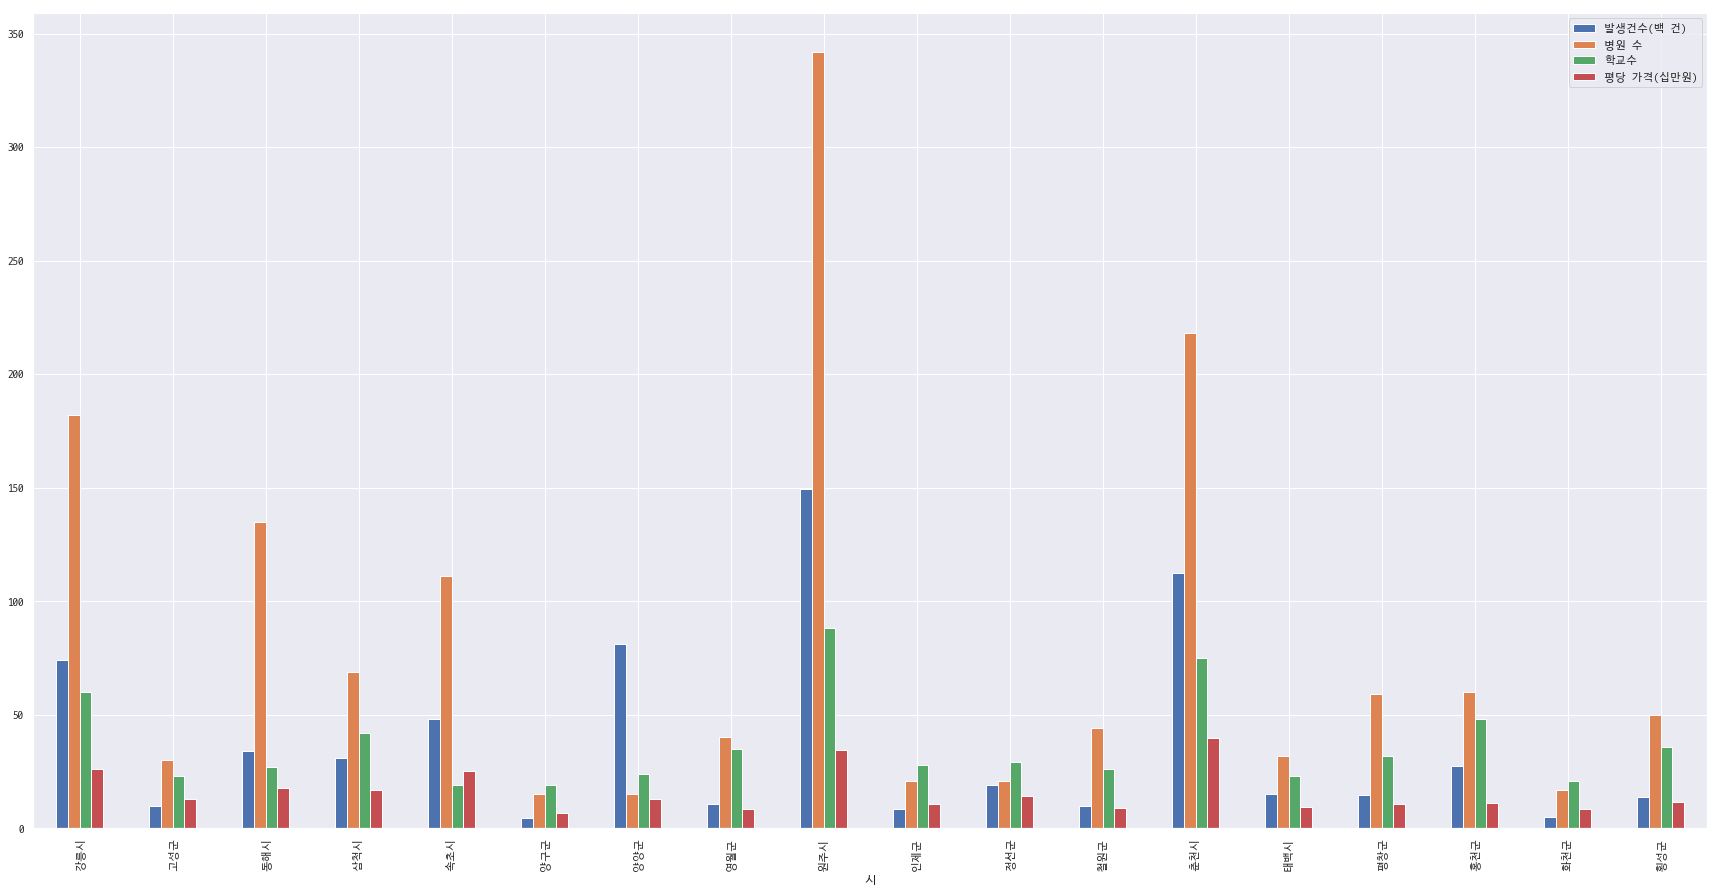

In [107]:
avg_data.plot.bar(figsize=(30, 15))

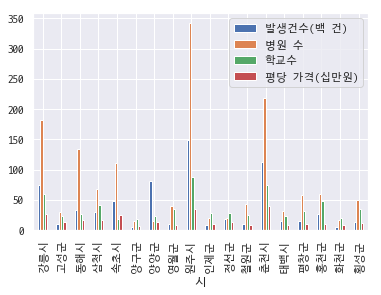

In [108]:
avg_data.plot.bar(stacked=False)

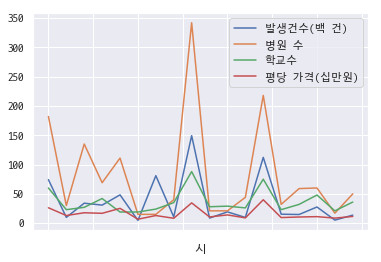

In [109]:
avg_data.plot()

C:\Users\Playdata\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Playdata\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Playdata\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Playdata\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


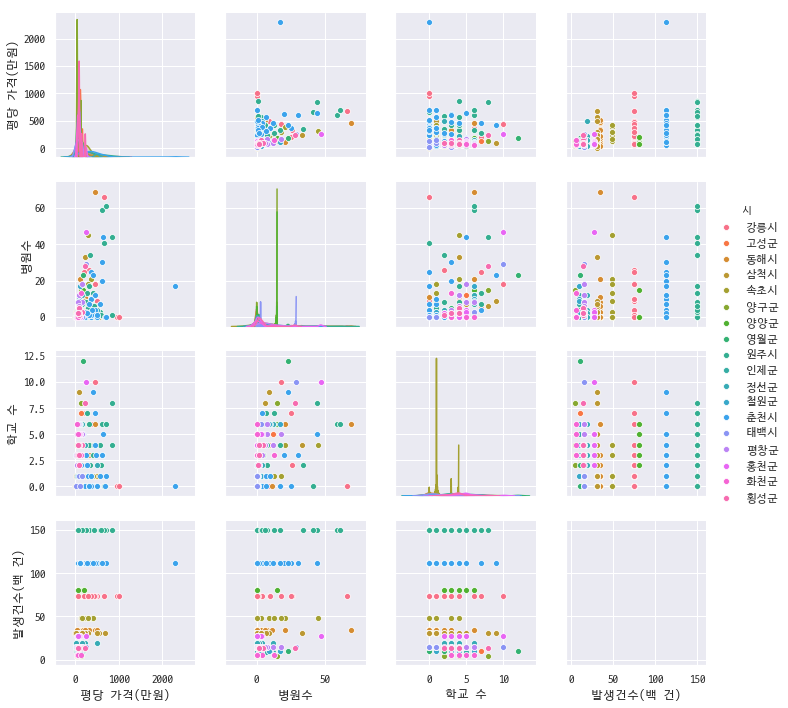

In [110]:
sns.pairplot(medical_budong_merge, hue="시")